<a href="https://colab.research.google.com/github/ShivamD27/users/blob/main/Fashion_Mst_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
train = pd.read_csv('fashion-mnist_train.csv')

train.shape

(60000, 785)

In [ ]:
test = pd.read_csv('fashion-mnist_test.csv')

test.shape

(10000, 785)

In [ ]:
X_train = train.iloc[:, train.columns != 'label']
y_train = train.iloc[:, train.columns == 'label']

X_test = test.iloc[:, test.columns != 'label']
y_test = test.iloc[:, test.columns == 'label']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000, 1), (10000, 784), (10000, 1))

In [ ]:
X_train = X_train.values.reshape(-1,28,28)
X_test = X_test.values.reshape(-1,28,28)

y_train = y_train.values.reshape(-1)
y_test = y_test.values.reshape(-1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=2020)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, padding='valid', input_shape=[28,28,1],kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_validation, y_validation), batch_size=512, verbose=1)

Epoch 1/10
94/94 [==============================] - 26s 265ms/step - loss: 0.6276 - accuracy: 0.7855 - val_loss: 0.4239 - val_accuracy: 0.8500
Epoch 2/10
94/94 [==============================] - 28s 292ms/step - loss: 0.3878 - accuracy: 0.8641 - val_loss: 0.3625 - val_accuracy: 0.8740
Epoch 3/10
94/94 [==============================] - 25s 260ms/step - loss: 0.3447 - accuracy: 0.8798 - val_loss: 0.3312 - val_accuracy: 0.8851
Epoch 4/10
94/94 [==============================] - 24s 261ms/step - loss: 0.3185 - accuracy: 0.8885 - val_loss: 0.3196 - val_accuracy: 0.8861
Epoch 5/10
94/94 [==============================] - 24s 260ms/step - loss: 0.2931 - accuracy: 0.8969 - val_loss: 0.3157 - val_accuracy: 0.8884
Epoch 6/10
94/94 [==============================] - 24s 257ms/step - loss: 0.2762 - accuracy: 0.9021 - val_loss: 0.2902 - val_accuracy: 0.8977
Epoch 7/10
94/94 [==============================] - 26s 271ms/step - loss: 0.2599 - accuracy: 0.9085 - val_loss: 0.2807 - val_accuracy: 0.9002

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2577 - accuracy: 0.9072


[0.25767582654953003, 0.9071999788284302]

In [ ]:
y_pred = model.predict(X_test).round(2)

313/313 [==============================] - 3s 10ms/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandle', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

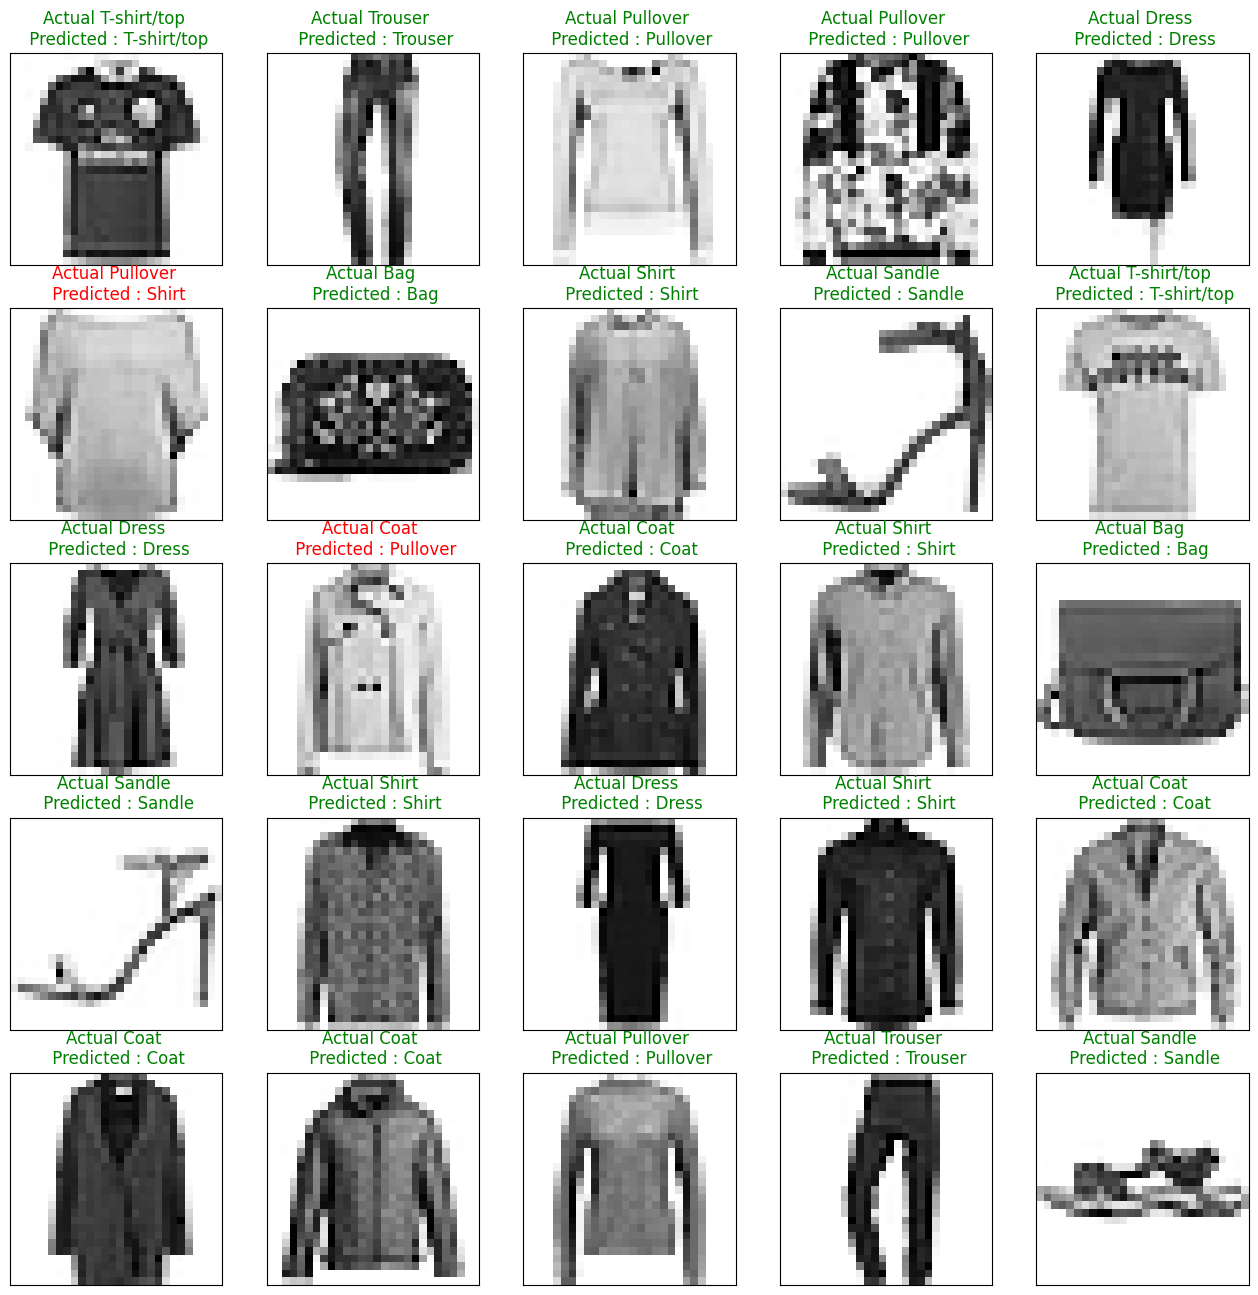

In [ ]:
plt.figure(figsize=(16,16))

j = 1
for i in range(25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_test[i], cmap='Greys')
  clr = ""
  if y_test[i] == np.argmax(y_pred[i]):
    clr = 'green'
  else:
    clr = 'red'
  plt.yticks([])
  plt.xticks([])
  plt.title(f"Actual {class_names[y_test[i]]} \n Predicted : {class_names[np.argmax(y_pred[i])]}",color=clr)

In [ ]:
y_pred_cm = [np.argmax(row) for row in y_pred]
y_pred_cm

<Axes: >

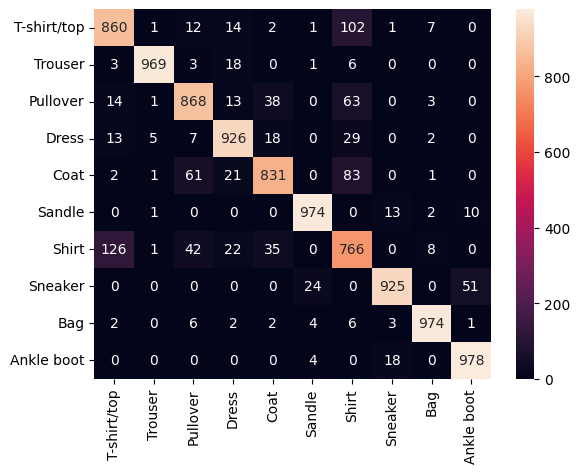

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_cm)

sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names, fmt='d')

In [ ]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred_cm, target_names=class_names)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.87      0.87      0.87      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.90      0.83      0.86      1000
      Sandle       0.97      0.97      0.97      1000
       Shirt       0.73      0.77      0.75      1000
     Sneaker       0.96      0.93      0.94      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.94      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

